In [1]:
import config
import pandas as pd
import psycopg2
import numpy as np

In [2]:
study_id = 10
sql = f"select * from depassement_study where id={study_id}"
df_study = pd.read_sql(sql, config.connection_string)
df_study

,id,profession_type,datesource_min,datesource_max,tarif_s1
0,10,Dentiste,2301,2308,120.0


In [3]:
profession_type = df_study.iloc[0]["profession_type"]
datesource_min = df_study.iloc[0]["datesource_min"]
datesource_max = df_study.iloc[0]["datesource_max"]
tarif_s1 = df_study.iloc[0]["tarif_s1"]
profession_type, datesource_min, datesource_max, tarif_s1

('Dentiste', 2301, 2308, 120.0)

In [4]:
sql = f"""
select p.*, t.*, tds.date_source_id, b.id as adresse_id, an.cp as cp, ar.dept_id as dept_id, b.code_insee from ps p
join tarif t on t.ps_id = p.id
join tarif_date_source tds on tds.tarif_id = t.id
join cabinet c on t.cabinet_id = c.id
join adresse_raw ar on c.adresse_raw_id = ar.id
join adresse_norm an on ar.adresse_norm_id = an.id
join ban b on an.ban_id = b.id
--join ps_cabinet_date_source pcd on pcd.ps_id = p.id and pcd.cabinet_id = c.id and pcd.date_source_id = tds.date_source_id
join profession_type pt on pt.profession = '{profession_type}' and t.profession_id = pt.profession_id
where tds.date_source_id >= {datesource_min} and  tds.date_source_id <= {datesource_max}
"""

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)

df = pd.read_csv("../data/depassement/d2.csv", low_memory=False)
# df = pd.read_sql(sql, config.connection_string)
df  #12103814 





,id,genre,key,nom,prenom,has_inpp,rule_nb,id.1,profession_id,mode_exercice_id,nature_id,convention_id,option_contrat,vitale,code,ps_id,cabinet_id,famille_acte_id,montant,borne_inf,borne_sup,montant_2,borne_inf_2,borne_sup_2,montant_imagerie,borne_inf_imagerie,borne_sup_imagerie,montant_anesthesie,borne_inf_anesthesie,borne_sup_anesthesie,montant_cec,borne_inf_cec,borne_sup_cec,tarif_id,date_source_id,id.2,nom.1,key.1,telephone,adresse_raw_id,id.3,adresse2,adresse3,adresse4,cp,commune,adresse_norm_id,dept_id,id.4,numero,rue1,rue2,cp.1,commune.1,osm_id,osm_score,ban_id,ban_score,source_id,lon,lat,score,dept_id.1,iris,rpps_score,id.5,adresse_id,numero.1,rep,nom_voie,code_postal,code_insee,nom_commune,nom_ancienne_commune,lon.1,lat.1,libelle_acheminement,nom_afnor,dept_id.2,is_lieu_dit
0,648401,H,810001124261,BOUCHERAS,JEAN CLAUDE,True,1.0,15850933,18,NaN,3,1,NaN,True,HBMD0170,648401,537,183.0,180.0,50.0,180.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15850933,2009,537,CABINET DENTAIRE BOUCHERAS JC,CABINET_DENTAIRE_BOUCHERAS_JC_01000_36B_RUE_CH...,474231270.0,383,383,NaN,36B RUE CHARLES ROBIN,NaN,1000,BOURG EN BRESSE,92851,1,92851,36.0,RUE CHARLES ROBIN,NaN,1000,BOURG EN BRESSE,NaN,NaN,229100,1.0000,2,5.232024,46.205798,1.0000,1,010530102,NaN,229100,01053_0820_00036,36.0,NaN,RUE CHARLES ROBIN,1000,1053,BOURG EN BRESSE,NaN,5.232024,46.205798,NaN,NaN,1,False
1,648402,H,810001128734,DURAND,PHILIPPE,True,1.0,15850964,18,NaN,3,1,NaN,True,HBFD0080,648402,534,87.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15850964,2009,534,DURAND PHILIPPE,DURAND_PHILIPPE_01210_45_AVENUE_VOLTAIRE,450426360.0,380,380,NaN,45 AVENUE VOLTAIRE,CENTRE D AUMARD,1210,FERNEY VOLTAIRE,371,1,371,45.0,AVENUE VOLTAIRE,NaN,1210,FERNEY VOLTAIRE,NaN,NaN,170033,1.0000,2,6.112375,46.258172,1.0000,1,011600102,1.00000,170033,01160_0030_00045,45.0,NaN,AVENUE VOLTAIRE,1210,1160,FERNEY VOLTAIRE,NaN,6.112375,46.258172,NaN,NaN,1,False
2,648428,F,810100711091,CLARON,MARJORIE,True,1.0,15851928,18,NaN,3,1,NaN,True,HBGD0430,648428,146175,128.0,50.2,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15851928,2009,146175,CLARON MARJORIE,CLARON_MARJORIE_01150_864_ROUTE_DU_PORT,474357454.0,382,382,NaN,864 ROUTE DU PORT,NaN,1150,LAGNIEU,373,1,373,864.0,ROUTE DU PORT,NaN,1150,LAGNIEU,NaN,NaN,148889,1.0000,2,5.347513,45.894452,1.0000,1,012020102,1.00000,148889,01202_0335_00864,864.0,NaN,ROUTE DU PORT,1150,1202,LAGNIEU,NaN,5.347513,45.894452,NaN,NaN,1,False
3,648451,F,810005198402,FOLLEAS,CLAIRE,True,2.0,15852692,18,NaN,3,1,NaN,True,HBMD0500,648451,541,211.0,42.0,33.7,42.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15852692,2009,541,CABINET DENTAIRE DR MALLYE CHARLES,CABINET_DENTAIRE_DR_MALLYE_CHARLES_01640_33_AV...,474368500.0,387,387,NaN,33 AVENUE DES SPORTS,NaN,1640,JUJURIEUX,378,1,378,33.0,AVENUE DES SPORTS,NaN,1640,JUJURIEUX,NaN,NaN,147789,1.0000,2,5.406782,46.039488,1.0000,1,011990000,NaN,147789,01199_0113_00033,33.0,NaN,AVENUE DES SPORTS,1640,1199,JUJURIEUX,NaN,5.406782,46.039488,NaN,NaN,1,False
4,648452,F,810005141477,ROYER,AURELIE,True,1.0,15852727,18,NaN,3,1,NaN,True,HBLD6340,648452,521,158.0,530.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15852727,2009,521,ROYER AURELIE,ROYER_AURELIE_01360_61_RUE_DES_VERCHERES,478327074.0,371,371,LA CABROTTE II,61 RUE DES VERCHERES,NaN,1360,LOYETTES,362,1,362,61.0,RUE DES VERCHERES,LA CABROTTE II,1360,LOYETTES,NaN,NaN,141943,1.0000,2,5.205856,45.775138,1.0000,1,012240000,NaN,141943,01224_0061_00061,61.0,NaN,RUE DES VERCHERES,1360,1224,LOYETTES,NaN,5.205856,45.775138,NaN,NaN,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12103809,681880,F,810000878578,MAINDRU DENIS,CAROLE,True,1.0,19536233,18,NaN,3,1,NaN,True,HBLD4180,681

In [5]:
# Renommer les colonnes
df.rename(columns={
    'genre': 'gender',
    'prenom': 'prénom',
    'code': 'codeccamdelacte',
    'nature_id': 'naturedexercice',
    'convention_id': 'convention',
    'code_insee': 'codeinsee',
    'cp': 'matchcp',
    'montant': 'montantgénéralementconstaté',
    'borne_inf': 'borneinférieuredumontant',
    'borne_sup': 'bornesupérieuredumontant',
    'option_contrat': 'optioncontratdaccèsauxsoins',
    'dept_id': 'dep',
}, inplace=True)

# Colonnes à conserver
df = df[['ps_id', 'gender', 'nom', 'prénom', 'codeccamdelacte', 'naturedexercice', 'convention',
         'codeinsee', 'montantgénéralementconstaté', 'borneinférieuredumontant', 'bornesupérieuredumontant',
         'adresse_id', 'date_source_id', 'optioncontratdaccèsauxsoins', 'matchcp', 'dep']]
df

,ps_id,gender,nom,prénom,codeccamdelacte,naturedexercice,convention,codeinsee,montantgénéralementconstaté,borneinférieuredumontant,bornesupérieuredumontant,adresse_id,date_source_id,optioncontratdaccèsauxsoins,matchcp,dep
0,648401,H,BOUCHERAS,JEAN CLAUDE,HBMD0170,3,1,1053,180.0,50.0,180.0,01053_0820_00036,2009,NaN,1000,1
1,648402,H,DURAND,PHILIPPE,HBFD0080,3,1,1160,0.0,0.0,0.0,01160_0030_00045,2009,NaN,1210,1
2,648428,F,CLARON,MARJORIE,HBGD0430,3,1,1202,50.2,0.0,0.0,01202_0335_00864,2009,NaN,1150,1
3,648451,F,FOLLEAS,CLAIRE,HBMD0500,3,1,1199,42.0,33.7,42.0,01199_0113_00033,2009,NaN,1640,1
4,648452,F,ROYER,AURELIE,HBLD6340,3,1,1224,530.0,0.0,0.0,01224_0061_00061,2009,NaN,1360,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12103809,681880,F,MAINDRU DENIS,CAROLE,HBLD4180,3,1,49092,735.0,585.0,735.0,49092_xoi7h6_00005,2108,NaN,49120,49
12103810,686206,H,AUBURTIN,LAURENT,HBLD0180,3,1,57751,0.0,0.0,0.0,57751_0180_00002,2108,NaN,57140,57
12103811,700960,F,BREFFEIL,MIREILLE,HBLD2270,3,1,72328,0.0,0.0,0.0,72328_0139_00006,2108,NaN,72190,72
12103812,706481,F,CORSIA HADDAD,LAURENCE,HBLD2450,2,1,75112,0.0,285.0,500.0,75112_2216_00010,2108,NaN,75012,75


In [6]:
# Clé combinée
pd.options.mode.copy_on_write = True
df['b'] = df['ps_id'].astype(str) + "_" + df['adresse_id'].astype(str)
df

,ps_id,gender,nom,prénom,codeccamdelacte,naturedexercice,convention,codeinsee,montantgénéralementconstaté,borneinférieuredumontant,bornesupérieuredumontant,adresse_id,date_source_id,optioncontratdaccèsauxsoins,matchcp,dep,b
0,648401,H,BOUCHERAS,JEAN CLAUDE,HBMD0170,3,1,1053,180.0,50.0,180.0,01053_0820_00036,2009,NaN,1000,1,648401_01053_0820_00036
1,648402,H,DURAND,PHILIPPE,HBFD0080,3,1,1160,0.0,0.0,0.0,01160_0030_00045,2009,NaN,1210,1,648402_01160_0030_00045
2,648428,F,CLARON,MARJORIE,HBGD0430,3,1,1202,50.2,0.0,0.0,01202_0335_00864,2009,NaN,1150,1,648428_01202_0335_00864
3,648451,F,FOLLEAS,CLAIRE,HBMD0500,3,1,1199,42.0,33.7,42.0,01199_0113_00033,2009,NaN,1640,1,648451_01199_0113_00033
4,648452,F,ROYER,AURELIE,HBLD6340,3,1,1224,530.0,0.0,0.0,01224_0061_00061,2009,NaN,1360,1,648452_01224_0061_00061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12103809,681880,F,MAINDRU DENIS,CAROLE,HBLD4180,3,1,49092,735.0,585.0,735.0,49092_xoi7h6_00005,2108,NaN,49120,49,681880_49092_xoi7h6_00005
12103810,686206,H,AUBURTIN,LAURENT,HBLD0180,3,1,57751,0.0,0.0,0.0,57751_0180_00002,2108,NaN,57140,57,686206_57751_0180_00002
12103811,700960,F,BREFFEIL,MIREILLE,HBLD2270,3,1,72328,0.0,0.0,0.0,72328_0139_00006,2108,NaN,72190,72,700960_72328_0139_00006
12103812,706481,F,CORSIA HADDAD,LAURENCE,HBLD2450,2,1,75112,0.0,285.0,500.0,75112_2216_00010,2108,NaN,75012,75,706481_75112_2216_00010


In [7]:
nb_ps_id = df["ps_id"].nunique()
nb_ps_id  # 34257 ok


34257

In [8]:
nb_b = df["b"].nunique()
nb_b  # 35321 ok

35321

In [9]:
df = df.sort_values(by='ps_id')
df['unique'] = df.groupby('ps_id')['adresse_id'].transform('nunique')
df['un'] = df['unique']
pd.set_option('display.max_rows', 200)
df.head(20)

,ps_id,gender,nom,prénom,codeccamdelacte,naturedexercice,convention,codeinsee,montantgénéralementconstaté,borneinférieuredumontant,bornesupérieuredumontant,adresse_id,date_source_id,optioncontratdaccèsauxsoins,matchcp,dep,b,unique,un
11295847,648284,F,GIRARD GOUGOT,KARINE,HBLD0380,3,1,1049,290.0,250.0,290.0,01049_0396_00157,2105,NaN,1120,1,648284_01049_0396_00157,1,1
1573552,648284,F,GIRARD GOUGOT,KARINE,HBLD3320,3,1,1049,0.0,0.0,0.0,01049_0396_00157,2103,NaN,1120,1,648284_01049_0396_00157,1,1
8989759,648284,F,GIRARD GOUGOT,KARINE,HBLD0900,3,1,1049,230.0,0.0,0.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1
4959527,648284,F,GIRARD GOUGOT,KARINE,HBMD0540,3,1,1049,0.0,0.0,0.0,01049_0396_00157,2012,NaN,1120,1,648284_01049_0396_00157,1,1
3850193,648284,F,GIRARD GOUGOT,KARINE,HBGD0350,3,1,1049,25.0,0.0,0.0,01049_0396_00157,2104,NaN,1120,1,648284_01049_0396_00157,1,1
8884316,648284,F,GIRARD GOUGOT,KARINE,HBMD0580,3,1,1049,25.1,19.3,25.1,01049_0396_00157,2010,NaN,1120,1,648284_01049_0396_00157,1,1
11292146,648284,F,GIRARD GOUGOT,KARINE,HBLD0380,3,1,1049,290.0,250.0,290.0,01049_0396_00157,2101,NaN,1120,1,648284_01049_0396_00157,1,1
7559322,648284,F,GIRARD GOUGOT,KARINE,HBLD0730,3,1,1049,0.0,0.0,0.0,01049_0396_00157,2012,NaN,1120,1,648284_01049_0396_00157,1,1
3944333,648284,F,GIRARD GOUGOT,KARINE,HBMD0580,3,1,1049,27.0,0.0,0.0,01049_0396_00157,2105,NaN,1120,1,648284_01049_0396_00157,1,1
3140364,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,530.0,530.0,550.0,01049_0396_00157,2107,NaN,1120,1,648284_01049_0396_00157,1,1


In [10]:
# Comptages globaux
df['NB_total'] = df.groupby('dep')['ps_id'].transform('nunique')
df = df.sort_values(by='dep')
df["NB_total"].unique() #ok

array([ 298,  206,  160,   87,   82, 1035,  157,  103,   85,  136,  219,
        142, 1455,  262,   71,  150,  360,  126,  125,  238,  306,   36,
        182,  270,  286,  183,  145,  502,  472, 1150,  101, 1088,  821,
        605,   66,  277,  634,  106,  236,  110,  324,  105,  828,  248,
         97,  131,   30,  373,  169,  315,   59,   98,  446,  426,  593,
         86, 1283,  284,   95,  614,  417,  527,  153,  291,  850,  424,
       1084,   72,  224,  196,  499, 1999,  464,  584,  725,  124,  166,
        199,  128,  736,  312,  337,  177,  149,  175,  109,   60,  563,
       1007,  479,  645,  506,  116,   78], dtype=int64)

In [11]:
df['c'] = 1
df['NB_Ftotal'] = df.groupby('c')['ps_id'].transform('nunique')
df["NB_Ftotal"].unique() # 34257 ok

array([34257], dtype=int64)

In [12]:
# Pondération
df['weight'] = df['un'].map({1: 1, 2: 0.5, 3: 0.33, 4: 0.25, 5: 0.2}).fillna(0)
df

,ps_id,gender,nom,prénom,codeccamdelacte,naturedexercice,convention,codeinsee,montantgénéralementconstaté,borneinférieuredumontant,bornesupérieuredumontant,adresse_id,date_source_id,optioncontratdaccèsauxsoins,matchcp,dep,b,unique,un,NB_total,c,NB_Ftotal,weight
11295847,648284,F,GIRARD GOUGOT,KARINE,HBLD0380,3,1,1049,290.0,250.0,290.0,01049_0396_00157,2105,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0
4172737,731844,F,CHEVASSUS ROUSSILLON,ISABELLE,HBMD0380,3,1,1249,41.0,41.0,53.0,01249_0240_00020,2010,NaN,1700,1,731844_01249_0240_00020,1,1,298,1,34257,1.0
7120996,731844,F,CHEVASSUS ROUSSILLON,ISABELLE,HBLD4700,3,1,1249,0.0,0.0,0.0,01249_0240_00020,2010,NaN,1700,1,731844_01249_0240_00020,1,1,298,1,34257,1.0
3634892,731844,F,CHEVASSUS ROUSSILLON,ISABELLE,HBLD7340,3,1,1249,550.0,0.0,0.0,01249_0240_00020,2103,NaN,1700,1,731844_01249_0240_00020,1,1,298,1,34257,1.0
2711553,731844,F,CHEVASSUS ROUSSILLON,ISABELLE,HBLD0310,3,1,1249,0.0,0.0,0.0,01249_0240_00020,2104,NaN,1700,1,731844_01249_0240_00020,1,1,298,1,34257,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3468596,659577,H,VALLA,MARTIN,HBGD3090,3,1,2B207,0.0,0.0,0.0,2b207_a8pbsj_00001_b,2105,NaN,20213,202,659577_2b207_a8pbsj_00001_b,2,2,78,1,34257,0.5
1524828,659577,H,VALLA,MARTIN,HBMD0380,3,1,2B207,61.0,0.0,0.0,2b207_a8pbsj_00001_b,2101,NaN,20213,202,659577_2b207_a8pbsj_00001_b,2,2,78,1,34257,0.5
6274524,659577,H,VALLA,MARTIN,HBLD4520,3,1,2B042,0.0,0.0,0.0,2b042_579xgr_00012,2011,NaN,20290,202,659577_2b042_579xgr_00012,2,2,78,1,34257,0.5
3063965,659577,H,VALLA,MARTIN,HBFD0210,3,1,2B042,0.0,0.0,0.0,2b042_579xgr_00012,2102,NaN,20290,202,659577_2b042_579xgr_00012,2,2,78,1,34257,0.5


In [13]:
df = df[df['codeccamdelacte'].isin(["HBLD4910","HBLD6340","HBLD7340"])]
df #595218 ok

,ps_id,gender,nom,prénom,codeccamdelacte,naturedexercice,convention,codeinsee,montantgénéralementconstaté,borneinférieuredumontant,bornesupérieuredumontant,adresse_id,date_source_id,optioncontratdaccèsauxsoins,matchcp,dep,b,unique,un,NB_total,c,NB_Ftotal,weight
3634892,731844,F,CHEVASSUS ROUSSILLON,ISABELLE,HBLD7340,3,1,1249,550.0,0.0,0.0,01249_0240_00020,2103,NaN,1700,1,731844_01249_0240_00020,1,1,298,1,34257,1.0
9584447,731844,F,CHEVASSUS ROUSSILLON,ISABELLE,HBLD4910,3,1,1249,550.0,0.0,0.0,01249_0240_00020,2012,NaN,1700,1,731844_01249_0240_00020,1,1,298,1,34257,1.0
9586550,731844,F,CHEVASSUS ROUSSILLON,ISABELLE,HBLD4910,3,1,1249,550.0,0.0,0.0,01249_0240_00020,2102,NaN,1700,1,731844_01249_0240_00020,1,1,298,1,34257,1.0
1769462,731844,F,CHEVASSUS ROUSSILLON,ISABELLE,HBLD4910,3,1,1249,550.0,530.0,550.0,01249_0240_00020,2009,NaN,1700,1,731844_01249_0240_00020,1,1,298,1,34257,1.0
4427831,731844,F,CHEVASSUS ROUSSILLON,ISABELLE,HBLD6340,3,1,1249,500.0,500.0,530.0,01249_0240_00020,2107,NaN,1700,1,731844_01249_0240_00020,1,1,298,1,34257,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5579169,659526,H,MORACCHINI,OLIVIER,HBLD7340,2,1,2B033,550.0,550.0,650.0,2b033_0005_00002,2103,NaN,20200,202,659526_2b033_0005_00002,1,1,78,1,34257,1.0
5580128,659526,H,MORACCHINI,OLIVIER,HBLD7340,2,1,2B033,550.0,550.0,650.0,2b033_0005_00002,2104,NaN,20200,202,659526_2b033_0005_00002,1,1,78,1,34257,1.0
10895222,659577,H,VALLA,MARTIN,HBLD6340,3,1,2B042,0.0,0.0,0.0,2b042_579xgr_00012,2009,NaN,20290,202,659577_2b042_579xgr_00012,2,2,78,1,34257,0.5
7227696,728561,F,MARTELLI BLANC,MARIANNE,HBLD6340,3,1,2B033,530.0,0.0,0.0,2b033_0400_00009,2009,NaN,20200,202,728561_2b033_0400_00009,1,1,78,1,34257,1.0


In [14]:
df["codeccamdelacte"].value_counts(normalize=True) #39 32 28 ok

codeccamdelacte
HBLD6340    0.392023
HBLD7340    0.327967
HBLD4910    0.280010
Name: proportion, dtype: float64

In [15]:
# Tous les praticiens ne font pas de consultation
df["ps_id"].nunique() #25084 ok

25084

In [16]:
# /!\ Différent des autres codes
df = df[df["montantgénéralementconstaté"] != 0]
df # 352554 ok

,ps_id,gender,nom,prénom,codeccamdelacte,naturedexercice,convention,codeinsee,montantgénéralementconstaté,borneinférieuredumontant,bornesupérieuredumontant,adresse_id,date_source_id,optioncontratdaccèsauxsoins,matchcp,dep,b,unique,un,NB_total,c,NB_Ftotal,weight
3634892,731844,F,CHEVASSUS ROUSSILLON,ISABELLE,HBLD7340,3,1,1249,550.0,0.0,0.0,01249_0240_00020,2103,NaN,1700,1,731844_01249_0240_00020,1,1,298,1,34257,1.0
9584447,731844,F,CHEVASSUS ROUSSILLON,ISABELLE,HBLD4910,3,1,1249,550.0,0.0,0.0,01249_0240_00020,2012,NaN,1700,1,731844_01249_0240_00020,1,1,298,1,34257,1.0
9586550,731844,F,CHEVASSUS ROUSSILLON,ISABELLE,HBLD4910,3,1,1249,550.0,0.0,0.0,01249_0240_00020,2102,NaN,1700,1,731844_01249_0240_00020,1,1,298,1,34257,1.0
1769462,731844,F,CHEVASSUS ROUSSILLON,ISABELLE,HBLD4910,3,1,1249,550.0,530.0,550.0,01249_0240_00020,2009,NaN,1700,1,731844_01249_0240_00020,1,1,298,1,34257,1.0
4427831,731844,F,CHEVASSUS ROUSSILLON,ISABELLE,HBLD6340,3,1,1249,500.0,500.0,530.0,01249_0240_00020,2107,NaN,1700,1,731844_01249_0240_00020,1,1,298,1,34257,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5577273,659526,H,MORACCHINI,OLIVIER,HBLD7340,2,1,2B033,550.0,550.0,650.0,2b033_0005_00002,2101,NaN,20200,202,659526_2b033_0005_00002,1,1,78,1,34257,1.0
4397704,659526,H,MORACCHINI,OLIVIER,HBLD6340,2,1,2B033,500.0,500.0,530.0,2b033_0005_00002,2012,NaN,20200,202,659526_2b033_0005_00002,1,1,78,1,34257,1.0
5579169,659526,H,MORACCHINI,OLIVIER,HBLD7340,2,1,2B033,550.0,550.0,650.0,2b033_0005_00002,2103,NaN,20200,202,659526_2b033_0005_00002,1,1,78,1,34257,1.0
5580128,659526,H,MORACCHINI,OLIVIER,HBLD7340,2,1,2B033,550.0,550.0,650.0,2b033_0005_00002,2104,NaN,20200,202,659526_2b033_0005_00002,1,1,78,1,34257,1.0


In [17]:
df["ps_id"].nunique() #20075 ok

20075

In [18]:
df = df.sort_values(by='convention')
df.groupby('convention')["ps_id"].nunique() #20046 29 ok

convention
1    20046
2       29
Name: ps_id, dtype: int64

In [19]:
df["codeccamdelacte"].value_counts(normalize=True) #48 31 20 ok

codeccamdelacte
HBLD6340    0.481478
HBLD7340    0.314979
HBLD4910    0.203543
Name: proportion, dtype: float64

In [20]:
df = df.sort_values(by=['b',"convention", "date_source_id"])
df.head(10)

,ps_id,gender,nom,prénom,codeccamdelacte,naturedexercice,convention,codeinsee,montantgénéralementconstaté,borneinférieuredumontant,bornesupérieuredumontant,adresse_id,date_source_id,optioncontratdaccèsauxsoins,matchcp,dep,b,unique,un,NB_total,c,NB_Ftotal,weight
375147,648284,F,GIRARD GOUGOT,KARINE,HBLD6340,3,1,1049,530.0,510.0,530.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0
11334198,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,550.0,480.0,550.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0
7673342,648284,F,GIRARD GOUGOT,KARINE,HBLD4910,3,1,1049,550.0,450.0,550.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0
11336113,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,550.0,480.0,550.0,01049_0396_00157,2010,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0
7675285,648284,F,GIRARD GOUGOT,KARINE,HBLD4910,3,1,1049,550.0,450.0,550.0,01049_0396_00157,2010,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0
377115,648284,F,GIRARD GOUGOT,KARINE,HBLD6340,3,1,1049,530.0,510.0,530.0,01049_0396_00157,2010,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0
377957,648284,F,GIRARD GOUGOT,KARINE,HBLD6340,3,1,1049,530.0,510.0,530.0,01049_0396_00157,2011,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0
11336924,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,550.0,480.0,550.0,01049_0396_00157,2011,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0
7676079,648284,F,GIRARD GOUGOT,KARINE,HBLD4910,3,1,1049,550.0,450.0,550.0,01049_0396_00157,2011,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0
3133907,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,530.0,530.0,550.0,01049_0396_00157,2012,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0


In [21]:
# Moyenne par groupe
# df['mp'] = df.groupby(['b', 'convention'])['montantgénéralementconstaté'].transform('mean')
df["mp"] = np.nan
mask = df["codeccamdelacte"] == "HBLD4910"
df.loc[mask, "mp"] = df[mask].groupby(["b", "convention"])["montantgénéralementconstaté"].transform("mean")
df["mp"].unique()

array([          nan,  550.        ,  610.        ,  485.        ,
        580.        ,  530.        ,  553.75      ,  496.25      ,
        579.        ,  555.        ,  570.        ,  505.        ,
        542.5       ,  552.5       ,  590.        ,  518.        ,
        577.        ,  574.        ,  562.5       ,  540.        ,
        595.        ,  557.5       ,  537.5       ,  575.        ,
        730.        ,  560.        ,  602.        ,  655.        ,
        480.        ,  500.        ,  520.        ,  532.5       ,
        620.        ,  545.        ,  495.        ,  720.        ,
        510.        ,  493.        ,  502.5       ,  536.25      ,
        561.25      ,  600.        ,  569.25      ,  660.        ,
        650.        ,  522.5       ,  470.        ,  380.        ,
        440.        ,  481.25      ,  442.5       ,  585.        ,
        525.        ,  430.        ,  762.        ,  630.        ,
        450.        ,  640.        ,  400.        ,  790.     

In [22]:
df["mp2"] = np.nan
mask = df["codeccamdelacte"] == "HBLD6340"
df.loc[mask, "mp2"] = df[mask].groupby(["b", "convention"])["montantgénéralementconstaté"].transform("mean")
df["mp2"].unique()

array([ 507.5       ,           nan,  530.        ,  496.25      ,
        500.        ,  505.        ,  522.5       ,  512.85714286,
        494.        ,  518.        ,  509.        ,  455.        ,
        150.        ,  515.        ,  490.        ,  511.25      ,
        495.        ,  450.        ,  502.5       ,  498.75      ,
        493.        ,  520.        ,  440.        ,  487.5       ,
        467.5       ,  477.5       ,  480.        ,  470.        ,
        519.        ,  460.        ,  650.        ,  430.        ,
        750.        ,  532.5       ,  110.        ,  107.5       ,
        350.        ,  482.5       ,  400.        ,  300.        ,
        473.2       ,  268.75      ,  485.        ,  508.18181818,
        506.25      ,  401.875     ,  501.        ,  495.75      ,
        471.25      ,  445.        ,  503.75      ,  488.75      ,
        550.        ,  420.        ,  680.        ,  510.        ,
        469.        ,  497.5       ,  525.        ,  504.28571

In [23]:
df["mp3"] = np.nan
mask = df["codeccamdelacte"] == "HBLD7340"
df.loc[mask, "mp3"] = df[mask].groupby(["b", "convention"])["montantgénéralementconstaté"].transform("mean")
df["mp3"].unique()

array([          nan,  535.        ,  610.        ,  550.        ,
        590.        ,  555.        ,  530.        ,  485.        ,
        580.        ,  520.        ,  522.5       ,  576.25      ,
        666.        ,  595.        ,  570.        ,  630.        ,
        542.5       ,  760.        ,  500.        ,  560.        ,
        507.5       ,  525.        ,  650.        ,  600.        ,
        540.        ,  575.        ,  655.        ,  620.        ,
        680.        ,  700.        ,  518.75      ,  730.        ,
        470.        ,  602.        ,  647.5       ,  605.        ,
        495.        ,  527.5       ,  493.        ,  533.75      ,
        660.        ,  720.        ,  510.        ,  512.5       ,
        513.75      ,  490.        ,  482.5       ,  480.        ,
        420.        ,  615.        ,  400.        ,  450.        ,
        380.        ,  390.        ,  481.25      ,  545.        ,
        519.        ,  493.75      ,  640.        ,  557.5    

In [61]:
# df = pd.read_csv("dentiste_debug.csv", low_memory=False)
df.head(10)
# df.to_csv("dentiste_debug.csv")

,Unnamed: 0,ps_id,gender,nom,prénom,codeccamdelacte,naturedexercice,convention,codeinsee,montantgénéralementconstaté,borneinférieuredumontant,bornesupérieuredumontant,adresse_id,date_source_id,optioncontratdaccèsauxsoins,matchcp,dep,b,unique,un,NB_total,c,NB_Ftotal,weight,mp,mp2,mp3
0,375147,648284,F,GIRARD GOUGOT,KARINE,HBLD6340,3,1,1049,530.0,510.0,530.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,NaN,507.5,NaN
1,11334198,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,550.0,480.0,550.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,NaN,NaN,535.0
2,7673342,648284,F,GIRARD GOUGOT,KARINE,HBLD4910,3,1,1049,550.0,450.0,550.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,NaN,NaN
3,11336113,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,550.0,480.0,550.0,01049_0396_00157,2010,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,NaN,NaN,535.0
4,7675285,648284,F,GIRARD GOUGOT,KARINE,HBLD4910,3,1,1049,550.0,450.0,550.0,01049_0396_00157,2010,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,NaN,NaN
5,377115,648284,F,GIRARD GOUGOT,KARINE,HBLD6340,3,1,1049,530.0,510.0,530.0,01049_0396_00157,2010,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,NaN,507.5,NaN
6,377957,648284,F,GIRARD GOUGOT,KARINE,HBLD6340,3,1,1049,530.0,510.0,530.0,01049_0396_00157,2011,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,NaN,507.5,NaN
7,11336924,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,550.0,480.0,550.0,01049_0396_00157,2011,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,NaN,NaN,535.0
8,7676079,648284,F,GIRARD GOUGOT,KARINE,HBLD4910,3,1,1049,550.0,450.0,550.0,01049_0396_00157,2011,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,NaN,NaN
9,3133907,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,530.0,530.0,550.0,01049_0396_00157,2012,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,NaN,NaN,535.0


Je pense qu'il y a une erreur de code dans code_dentiste.do ligne 76 : ```duplicates drop b convention, force```  
Tu perds une grande partie des mp, mp2, mp3  
Il aurait fallu faire avant le drop un max des mp, mp2, mp3 pour chaque ps unique  
En effet pour le ps suivant
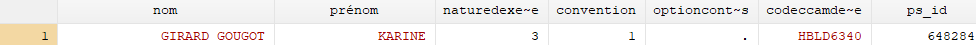  
Avant le drop  
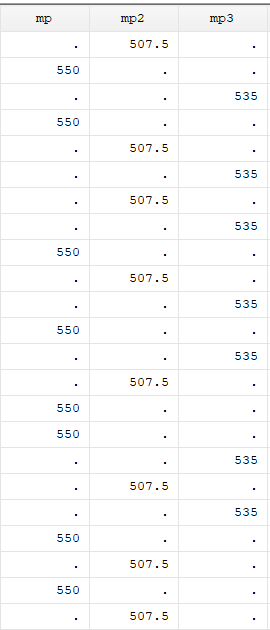  
Après le drop  
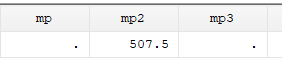  
Tu as perdu mp et mp3


In [62]:
df['mp'] = df.groupby(['b', 'convention'])['mp'].transform('max')
df['mp2'] = df.groupby(['b', 'convention'])['mp2'].transform('max')
df['mp3'] = df.groupby(['b', 'convention'])['mp3'].transform('max')
df.head(10)

,Unnamed: 0,ps_id,gender,nom,prénom,codeccamdelacte,naturedexercice,convention,codeinsee,montantgénéralementconstaté,borneinférieuredumontant,bornesupérieuredumontant,adresse_id,date_source_id,optioncontratdaccèsauxsoins,matchcp,dep,b,unique,un,NB_total,c,NB_Ftotal,weight,mp,mp2,mp3
0,375147,648284,F,GIRARD GOUGOT,KARINE,HBLD6340,3,1,1049,530.0,510.0,530.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0
1,11334198,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,550.0,480.0,550.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0
2,7673342,648284,F,GIRARD GOUGOT,KARINE,HBLD4910,3,1,1049,550.0,450.0,550.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0
3,11336113,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,550.0,480.0,550.0,01049_0396_00157,2010,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0
4,7675285,648284,F,GIRARD GOUGOT,KARINE,HBLD4910,3,1,1049,550.0,450.0,550.0,01049_0396_00157,2010,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0
5,377115,648284,F,GIRARD GOUGOT,KARINE,HBLD6340,3,1,1049,530.0,510.0,530.0,01049_0396_00157,2010,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0
6,377957,648284,F,GIRARD GOUGOT,KARINE,HBLD6340,3,1,1049,530.0,510.0,530.0,01049_0396_00157,2011,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0
7,11336924,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,550.0,480.0,550.0,01049_0396_00157,2011,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0
8,7676079,648284,F,GIRARD GOUGOT,KARINE,HBLD4910,3,1,1049,550.0,450.0,550.0,01049_0396_00157,2011,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0
9,3133907,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,530.0,530.0,550.0,01049_0396_00157,2012,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0


In [67]:
df = df.sort_values(by=['dep',"convention"])
df["NB"] = np.nan
mask = df["codeccamdelacte"] == "HBLD4910"
df.loc[mask, "NB"] = df[mask].groupby(["dep", "convention"])["ps_id"].transform("nunique")
df['NB'] = df.groupby(['dep', "convention"])['NB'].transform('mean')
df

,Unnamed: 0,ps_id,gender,nom,prénom,codeccamdelacte,naturedexercice,convention,codeinsee,montantgénéralementconstaté,borneinférieuredumontant,bornesupérieuredumontant,adresse_id,date_source_id,optioncontratdaccèsauxsoins,matchcp,dep,b,unique,un,NB_total,c,NB_Ftotal,weight,mp,mp2,mp3,NB
0,375147,648284,F,GIRARD GOUGOT,KARINE,HBLD6340,3,1,1049,530.0,510.0,530.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0
1,11334198,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,550.0,480.0,550.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0
2,7673342,648284,F,GIRARD GOUGOT,KARINE,HBLD4910,3,1,1049,550.0,450.0,550.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0
3,11336113,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,550.0,480.0,550.0,01049_0396_00157,2010,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0
4,7675285,648284,F,GIRARD GOUGOT,KARINE,HBLD4910,3,1,1049,550.0,450.0,550.0,01049_0396_00157,2010,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336497,11911042,769027,H,LAPLANCHE,OLIVIER,HBLD6340,3,2,2B033,500.0,0.0,0.0,2b033_1280_00037,2104,NaN,20200,202,769027_2b033_1280_00037,1,1,78,1,34257,1.0,NaN,500.0,NaN,NaN
336498,11912040,769027,H,LAPLANCHE,OLIVIER,HBLD6340,3,2,2B033,500.0,0.0,0.0,2b033_1280_00037,2105,NaN,20200,202,769027_2b033_1280_00037,1,1,78,1,34257,1.0,NaN,500.0,NaN,NaN
336499,11912804,769027,H,LAPLANCHE,OLIVIER,HBLD6340,3,2,2B033,500.0,0.0,0.0,2b033_1280_00037,2106,NaN,20200,202,769027_2b033_1280_00037,1,1,78,1,34257,1.0,NaN,500.0,NaN,NaN
336500,11913958,769027,H,LAPLANCHE,OLIVIER,HBLD6340,3,2,2B033,500.0,0.0,0.0,2b033_1280_00037,2107,NaN,20200,202,769027_2b033_1280_00037,1,1,78,1,34257,1.0,NaN,500.0,NaN,NaN


In [70]:
df = df.sort_values(by=['dep',"convention"])
df["NB2"] = np.nan
mask = df["codeccamdelacte"] == "HBLD6340"
df.loc[mask, "NB2"] = df[mask].groupby(["dep", "convention"])["ps_id"].transform("nunique")
df['NB2'] = df.groupby(['dep', "convention"])['NB2'].transform('mean')
df.head(10)

,Unnamed: 0,ps_id,gender,nom,prénom,codeccamdelacte,naturedexercice,convention,codeinsee,montantgénéralementconstaté,borneinférieuredumontant,bornesupérieuredumontant,adresse_id,date_source_id,optioncontratdaccèsauxsoins,matchcp,dep,b,unique,un,NB_total,c,NB_Ftotal,weight,mp,mp2,mp3,NB,NB2
0,375147,648284,F,GIRARD GOUGOT,KARINE,HBLD6340,3,1,1049,530.0,510.0,530.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0
1,11334198,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,550.0,480.0,550.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0
2,7673342,648284,F,GIRARD GOUGOT,KARINE,HBLD4910,3,1,1049,550.0,450.0,550.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0
3,11336113,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,550.0,480.0,550.0,01049_0396_00157,2010,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0
4,7675285,648284,F,GIRARD GOUGOT,KARINE,HBLD4910,3,1,1049,550.0,450.0,550.0,01049_0396_00157,2010,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0
5,377115,648284,F,GIRARD GOUGOT,KARINE,HBLD6340,3,1,1049,530.0,510.0,530.0,01049_0396_00157,2010,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0
6,377957,648284,F,GIRARD GOUGOT,KARINE,HBLD6340,3,1,1049,530.0,510.0,530.0,01049_0396_00157,2011,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0
7,11336924,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,550.0,480.0,550.0,01049_0396_00157,2011,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0
8,7676079,648284,F,GIRARD GOUGOT,KARINE,HBLD4910,3,1,1049,550.0,450.0,550.0,01049_0396_00157,2011,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0
9,3133907,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,530.0,530.0,550.0,01049_0396_00157,2012,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0


In [71]:
df = df.sort_values(by=['dep',"convention"])
df["NB3"] = np.nan
mask = df["codeccamdelacte"] == "HBLD7340"
df.loc[mask, "NB3"] = df[mask].groupby(["dep", "convention"])["ps_id"].transform("nunique")
df['NB3'] = df.groupby(['dep', "convention"])['NB3'].transform('mean')
df.head(10)

,Unnamed: 0,ps_id,gender,nom,prénom,codeccamdelacte,naturedexercice,convention,codeinsee,montantgénéralementconstaté,borneinférieuredumontant,bornesupérieuredumontant,adresse_id,date_source_id,optioncontratdaccèsauxsoins,matchcp,dep,b,unique,un,NB_total,c,NB_Ftotal,weight,mp,mp2,mp3,NB,NB2,NB3
0,375147,648284,F,GIRARD GOUGOT,KARINE,HBLD6340,3,1,1049,530.0,510.0,530.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0
1,11334198,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,550.0,480.0,550.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0
2,7673342,648284,F,GIRARD GOUGOT,KARINE,HBLD4910,3,1,1049,550.0,450.0,550.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0
3,11336113,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,550.0,480.0,550.0,01049_0396_00157,2010,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0
4,7675285,648284,F,GIRARD GOUGOT,KARINE,HBLD4910,3,1,1049,550.0,450.0,550.0,01049_0396_00157,2010,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0
5,377115,648284,F,GIRARD GOUGOT,KARINE,HBLD6340,3,1,1049,530.0,510.0,530.0,01049_0396_00157,2010,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0
6,377957,648284,F,GIRARD GOUGOT,KARINE,HBLD6340,3,1,1049,530.0,510.0,530.0,01049_0396_00157,2011,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0
7,11336924,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,550.0,480.0,550.0,01049_0396_00157,2011,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0
8,7676079,648284,F,GIRARD GOUGOT,KARINE,HBLD4910,3,1,1049,550.0,450.0,550.0,01049_0396_00157,2011,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0
9,3133907,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,530.0,530.0,550.0,01049_0396_00157,2012,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0


In [73]:
df["NB_F"] = np.nan
mask = df["codeccamdelacte"] == "HBLD4910"
df.loc[mask, "NB_F"] = df[mask].groupby(["c"])["ps_id"].transform("nunique")
df['NB_F'] = df.groupby(["c"])['NB_F'].transform('mean')
df.head(10)

,Unnamed: 0,ps_id,gender,nom,prénom,codeccamdelacte,naturedexercice,convention,codeinsee,montantgénéralementconstaté,borneinférieuredumontant,bornesupérieuredumontant,adresse_id,date_source_id,optioncontratdaccèsauxsoins,matchcp,dep,b,unique,un,NB_total,c,NB_Ftotal,weight,mp,mp2,mp3,NB,NB2,NB3,NB_F
0,375147,648284,F,GIRARD GOUGOT,KARINE,HBLD6340,3,1,1049,530.0,510.0,530.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0,9063.0
1,11334198,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,550.0,480.0,550.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0,9063.0
2,7673342,648284,F,GIRARD GOUGOT,KARINE,HBLD4910,3,1,1049,550.0,450.0,550.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0,9063.0
3,11336113,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,550.0,480.0,550.0,01049_0396_00157,2010,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0,9063.0
4,7675285,648284,F,GIRARD GOUGOT,KARINE,HBLD4910,3,1,1049,550.0,450.0,550.0,01049_0396_00157,2010,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0,9063.0
5,377115,648284,F,GIRARD GOUGOT,KARINE,HBLD6340,3,1,1049,530.0,510.0,530.0,01049_0396_00157,2010,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0,9063.0
6,377957,648284,F,GIRARD GOUGOT,KARINE,HBLD6340,3,1,1049,530.0,510.0,530.0,01049_0396_00157,2011,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0,9063.0
7,11336924,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,550.0,480.0,550.0,01049_0396_00157,2011,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0,9063.0
8,7676079,648284,F,GIRARD GOUGOT,KARINE,HBLD4910,3,1,1049,550.0,450.0,550.0,01049_0396_00157,2011,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0,9063.0
9,3133907,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,530.0,530.0,550.0,01049_0396_00157,2012,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0,9063.0


In [78]:
df["NB2_F"] = np.nan
mask = df["codeccamdelacte"] == "HBLD6340"
df.loc[mask, "NB2_F"] = df[mask].groupby(["c"])["ps_id"].transform("nunique")
df['NB2_F'] = df.groupby(["c"])['NB2_F'].transform('mean')
df.head(10)

,Unnamed: 0,ps_id,gender,nom,prénom,codeccamdelacte,naturedexercice,convention,codeinsee,montantgénéralementconstaté,borneinférieuredumontant,bornesupérieuredumontant,adresse_id,date_source_id,optioncontratdaccèsauxsoins,matchcp,dep,b,unique,un,NB_total,c,NB_Ftotal,weight,mp,mp2,mp3,NB,NB2,NB3,NB_F,NB2_F
0,375147,648284,F,GIRARD GOUGOT,KARINE,HBLD6340,3,1,1049,530.0,510.0,530.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0,9063.0,17765.0
1,11334198,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,550.0,480.0,550.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0,9063.0,17765.0
2,7673342,648284,F,GIRARD GOUGOT,KARINE,HBLD4910,3,1,1049,550.0,450.0,550.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0,9063.0,17765.0
3,11336113,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,550.0,480.0,550.0,01049_0396_00157,2010,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0,9063.0,17765.0
4,7675285,648284,F,GIRARD GOUGOT,KARINE,HBLD4910,3,1,1049,550.0,450.0,550.0,01049_0396_00157,2010,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0,9063.0,17765.0
5,377115,648284,F,GIRARD GOUGOT,KARINE,HBLD6340,3,1,1049,530.0,510.0,530.0,01049_0396_00157,2010,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0,9063.0,17765.0
6,377957,648284,F,GIRARD GOUGOT,KARINE,HBLD6340,3,1,1049,530.0,510.0,530.0,01049_0396_00157,2011,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0,9063.0,17765.0
7,11336924,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,550.0,480.0,550.0,01049_0396_00157,2011,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0,9063.0,17765.0
8,7676079,648284,F,GIRARD GOUGOT,KARINE,HBLD4910,3,1,1049,550.0,450.0,550.0,01049_0396_00157,2011,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0,9063.0,17765.0
9,3133907,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,530.0,530.0,550.0,01049_0396_00157,2012,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0,9063.0,17765.0


In [79]:
df["NB3_F"] = np.nan
mask = df["codeccamdelacte"] == "HBLD7340"
df.loc[mask, "NB3_F"] = df[mask].groupby(["c"])["ps_id"].transform("nunique")
df['NB3_F'] = df.groupby(["c"])['NB3_F'].transform('mean')
df.head(10)

,Unnamed: 0,ps_id,gender,nom,prénom,codeccamdelacte,naturedexercice,convention,codeinsee,montantgénéralementconstaté,borneinférieuredumontant,bornesupérieuredumontant,adresse_id,date_source_id,optioncontratdaccèsauxsoins,matchcp,dep,b,unique,un,NB_total,c,NB_Ftotal,weight,mp,mp2,mp3,NB,NB2,NB3,NB_F,NB2_F,NB3_F
0,375147,648284,F,GIRARD GOUGOT,KARINE,HBLD6340,3,1,1049,530.0,510.0,530.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0,9063.0,17765.0,13029.0
1,11334198,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,550.0,480.0,550.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0,9063.0,17765.0,13029.0
2,7673342,648284,F,GIRARD GOUGOT,KARINE,HBLD4910,3,1,1049,550.0,450.0,550.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0,9063.0,17765.0,13029.0
3,11336113,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,550.0,480.0,550.0,01049_0396_00157,2010,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0,9063.0,17765.0,13029.0
4,7675285,648284,F,GIRARD GOUGOT,KARINE,HBLD4910,3,1,1049,550.0,450.0,550.0,01049_0396_00157,2010,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0,9063.0,17765.0,13029.0
5,377115,648284,F,GIRARD GOUGOT,KARINE,HBLD6340,3,1,1049,530.0,510.0,530.0,01049_0396_00157,2010,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0,9063.0,17765.0,13029.0
6,377957,648284,F,GIRARD GOUGOT,KARINE,HBLD6340,3,1,1049,530.0,510.0,530.0,01049_0396_00157,2011,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0,9063.0,17765.0,13029.0
7,11336924,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,550.0,480.0,550.0,01049_0396_00157,2011,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0,9063.0,17765.0,13029.0
8,7676079,648284,F,GIRARD GOUGOT,KARINE,HBLD4910,3,1,1049,550.0,450.0,550.0,01049_0396_00157,2011,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0,9063.0,17765.0,13029.0
9,3133907,648284,F,GIRARD GOUGOT,KARINE,HBLD7340,3,1,1049,530.0,530.0,550.0,01049_0396_00157,2012,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.5,535.0,101.0,171.0,138.0,9063.0,17765.0,13029.0


In [80]:
df = df.drop_duplicates(subset=['b', 'convention']) # 20279 ok
df.head(10)

,Unnamed: 0,ps_id,gender,nom,prénom,codeccamdelacte,naturedexercice,convention,codeinsee,montantgénéralementconstaté,borneinférieuredumontant,bornesupérieuredumontant,adresse_id,date_source_id,optioncontratdaccèsauxsoins,matchcp,dep,b,unique,un,NB_total,c,NB_Ftotal,weight,mp,mp2,mp3,NB,NB2,NB3,NB_F,NB2_F,NB3_F
0,375147,648284,F,GIRARD GOUGOT,KARINE,HBLD6340,3,1,1049,530.0,510.0,530.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.50,535.0,101.0,171.0,138.0,9063.0,17765.0,13029.0
36,6695517,648293,F,LESNER,GABRIELA,HBLD4910,3,1,1202,610.0,550.0,610.0,01202_ywm94z_00029,2009,NaN,1150,1,648293_01202_ywm94z_00029,1,1,298,1,34257,1.0,610.0,530.00,610.0,101.0,171.0,138.0,9063.0,17765.0,13029.0
45,10529098,648298,F,KATONA,DANIELA,HBLD7340,3,1,1269,550.0,0.0,0.0,01269_0300_00003,2009,NaN,1130,1,648298_01269_0300_00003,1,1,298,1,34257,1.0,550.0,507.50,550.0,101.0,171.0,138.0,9063.0,17765.0,13029.0
78,8906202,648306,H,ROGOZ,VLAD,HBLD7340,3,1,1283,590.0,530.0,590.0,01283_1130_00025,2009,NaN,1100,1,648306_01283_1130_00025,1,1,298,1,34257,1.0,NaN,507.50,590.0,101.0,171.0,138.0,9063.0,17765.0,13029.0
102,5276413,648313,F,CHENESSEAU,ANNE CECILE,HBLD7340,3,1,1005,555.0,0.0,0.0,01005_0250_00061,2009,NaN,1330,1,648313_01005_0250_00061,1,1,298,1,34257,1.0,550.0,507.50,555.0,101.0,171.0,138.0,9063.0,17765.0,13029.0
135,8242889,648314,F,DE MONTGOLFIER,DIANE,HBLD6340,3,1,1304,530.0,0.0,0.0,01304_0120_00016,2009,NaN,1160,1,648314_01304_0120_00016,1,1,298,1,34257,1.0,NaN,507.50,530.0,101.0,171.0,138.0,9063.0,17765.0,13029.0
159,8173062,648351,H,VERON,SERGE,HBLD6340,3,1,1194,485.0,0.0,0.0,01194_0020_00390,2009,NaN,1480,1,648351_01194_0020_00390,1,1,298,1,34257,1.0,485.0,496.25,485.0,101.0,171.0,138.0,9063.0,17765.0,13029.0
186,11666688,648352,F,DESCOURVIERES CHICHOUX,MARTINE,HBLD4910,3,1,1426,580.0,0.0,0.0,01426_0140_00244,2009,NaN,1370,1,648352_01426_0140_00244,1,1,298,1,34257,1.0,580.0,530.00,580.0,101.0,171.0,138.0,9063.0,17765.0,13029.0
195,10458375,648353,H,PELISSIER,CLAUDE,HBLD6340,3,1,1305,530.0,0.0,0.0,01305_0071_00004,2009,NaN,1190,1,648353_01305_0071_00004,1,1,298,1,34257,1.0,550.0,507.50,520.0,101.0,171.0,138.0,9063.0,17765.0,13029.0
228,11725895,648354,H,SAMETZKY,IVAN,HBLD4910,3,1,1427,530.0,0.0,0.0,01427_1040_00026,2009,NaN,1600,1,648354_01427_1040_00026,1,1,298,1,34257,1.0,530.0,507.50,535.0,101.0,171.0,138.0,9063.0,17765.0,13029.0


In [81]:
df = df.sort_values(by=['b',"convention"])
df["prixmoyen"]=df["mp"]
df["prixmoyen2"]=df["mp2"]
df["prixmoyen3"]=df["mp3"]
df.head(10)

,Unnamed: 0,ps_id,gender,nom,prénom,codeccamdelacte,naturedexercice,convention,codeinsee,montantgénéralementconstaté,borneinférieuredumontant,bornesupérieuredumontant,adresse_id,date_source_id,optioncontratdaccèsauxsoins,matchcp,dep,b,unique,un,NB_total,c,NB_Ftotal,weight,mp,mp2,mp3,NB,NB2,NB3,NB_F,NB2_F,NB3_F,prixmoyen,prixmoyen2,prixmoyen3
0,375147,648284,F,GIRARD GOUGOT,KARINE,HBLD6340,3,1,1049,530.0,510.0,530.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.50,535.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,550.0,507.50,535.0
36,6695517,648293,F,LESNER,GABRIELA,HBLD4910,3,1,1202,610.0,550.0,610.0,01202_ywm94z_00029,2009,NaN,1150,1,648293_01202_ywm94z_00029,1,1,298,1,34257,1.0,610.0,530.00,610.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,610.0,530.00,610.0
45,10529098,648298,F,KATONA,DANIELA,HBLD7340,3,1,1269,550.0,0.0,0.0,01269_0300_00003,2009,NaN,1130,1,648298_01269_0300_00003,1,1,298,1,34257,1.0,550.0,507.50,550.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,550.0,507.50,550.0
78,8906202,648306,H,ROGOZ,VLAD,HBLD7340,3,1,1283,590.0,530.0,590.0,01283_1130_00025,2009,NaN,1100,1,648306_01283_1130_00025,1,1,298,1,34257,1.0,NaN,507.50,590.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,NaN,507.50,590.0
102,5276413,648313,F,CHENESSEAU,ANNE CECILE,HBLD7340,3,1,1005,555.0,0.0,0.0,01005_0250_00061,2009,NaN,1330,1,648313_01005_0250_00061,1,1,298,1,34257,1.0,550.0,507.50,555.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,550.0,507.50,555.0
135,8242889,648314,F,DE MONTGOLFIER,DIANE,HBLD6340,3,1,1304,530.0,0.0,0.0,01304_0120_00016,2009,NaN,1160,1,648314_01304_0120_00016,1,1,298,1,34257,1.0,NaN,507.50,530.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,NaN,507.50,530.0
159,8173062,648351,H,VERON,SERGE,HBLD6340,3,1,1194,485.0,0.0,0.0,01194_0020_00390,2009,NaN,1480,1,648351_01194_0020_00390,1,1,298,1,34257,1.0,485.0,496.25,485.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,485.0,496.25,485.0
186,11666688,648352,F,DESCOURVIERES CHICHOUX,MARTINE,HBLD4910,3,1,1426,580.0,0.0,0.0,01426_0140_00244,2009,NaN,1370,1,648352_01426_0140_00244,1,1,298,1,34257,1.0,580.0,530.00,580.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,580.0,530.00,580.0
195,10458375,648353,H,PELISSIER,CLAUDE,HBLD6340,3,1,1305,530.0,0.0,0.0,01305_0071_00004,2009,NaN,1190,1,648353_01305_0071_00004,1,1,298,1,34257,1.0,550.0,507.50,520.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,550.0,507.50,520.0
228,11725895,648354,H,SAMETZKY,IVAN,HBLD4910,3,1,1427,530.0,0.0,0.0,01427_1040_00026,2009,NaN,1600,1,648354_01427_1040_00026,1,1,298,1,34257,1.0,530.0,507.50,535.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,530.0,507.50,535.0


In [85]:
df["ps_id"].nunique(), df[df["convention"]==1]["ps_id"].nunique(), df[df["convention"]==2]["ps_id"].nunique(), df[df["convention"]==3]["ps_id"].nunique()
# 20075 20046 29 0 ok

(20075, 20046, 29, 0)

In [93]:
df = df.drop_duplicates(subset=['b']) # 20279 ok
len(df) #20279 ok

20279

In [87]:
df.to_csv("dentiste_prix_ok.csv")
# df1 = df[df["dep"]==1]
# print(len(df1)) #189 ok
# df1["ps_id"].nunique() #189 ok
# df11=df1[df1["codeccamdelacte"] == "HBLD4910"]
# len(df11)

In [89]:
# df = df.sort_values(by=['dep'])
# mask = df["codeccamdelacte"] == "HBLD4910"
# df["NB"]=df[mask].groupby("dep")["ps_id"].transform("nunique")
# df

In [88]:
tarif_s1

120.0

In [ ]:
# df = df.drop_duplicates(subset=['b']) # inutile
# A garder
# print(len(df[df["prixmoyen"] == 0])) #2
# print(len(df[df["prixmoyen"] < tarif_s1])) #78 /!\
# df['prixmoyen'] = df['prixmoyen'].replace(0, tarif_s1)
# df.loc[df['prixmoyen'] < tarif_s1, 'prixmoyen'] = tarif_s1
# # ////Prix OK ////
# df['prixmoyen'].unique()

In [91]:
# Dépassement
df['exessr'] = ((df['prixmoyen'] - tarif_s1) / tarif_s1) * 100
df['exessr2'] = ((df['prixmoyen2'] - tarif_s1) / tarif_s1) * 100
df['exessr3'] = ((df['prixmoyen3'] - tarif_s1) / tarif_s1) * 100
df.head(10)

,Unnamed: 0,ps_id,gender,nom,prénom,codeccamdelacte,naturedexercice,convention,codeinsee,montantgénéralementconstaté,borneinférieuredumontant,bornesupérieuredumontant,adresse_id,date_source_id,optioncontratdaccèsauxsoins,matchcp,dep,b,unique,un,NB_total,c,NB_Ftotal,weight,mp,mp2,mp3,NB,NB2,NB3,NB_F,NB2_F,NB3_F,prixmoyen,prixmoyen2,prixmoyen3,exessr,exessr2,exessr3
0,375147,648284,F,GIRARD GOUGOT,KARINE,HBLD6340,3,1,1049,530.0,510.0,530.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.50,535.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,550.0,507.50,535.0,358.333333,322.916667,345.833333
36,6695517,648293,F,LESNER,GABRIELA,HBLD4910,3,1,1202,610.0,550.0,610.0,01202_ywm94z_00029,2009,NaN,1150,1,648293_01202_ywm94z_00029,1,1,298,1,34257,1.0,610.0,530.00,610.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,610.0,530.00,610.0,408.333333,341.666667,408.333333
45,10529098,648298,F,KATONA,DANIELA,HBLD7340,3,1,1269,550.0,0.0,0.0,01269_0300_00003,2009,NaN,1130,1,648298_01269_0300_00003,1,1,298,1,34257,1.0,550.0,507.50,550.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,550.0,507.50,550.0,358.333333,322.916667,358.333333
78,8906202,648306,H,ROGOZ,VLAD,HBLD7340,3,1,1283,590.0,530.0,590.0,01283_1130_00025,2009,NaN,1100,1,648306_01283_1130_00025,1,1,298,1,34257,1.0,NaN,507.50,590.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,NaN,507.50,590.0,NaN,322.916667,391.666667
102,5276413,648313,F,CHENESSEAU,ANNE CECILE,HBLD7340,3,1,1005,555.0,0.0,0.0,01005_0250_00061,2009,NaN,1330,1,648313_01005_0250_00061,1,1,298,1,34257,1.0,550.0,507.50,555.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,550.0,507.50,555.0,358.333333,322.916667,362.500000
135,8242889,648314,F,DE MONTGOLFIER,DIANE,HBLD6340,3,1,1304,530.0,0.0,0.0,01304_0120_00016,2009,NaN,1160,1,648314_01304_0120_00016,1,1,298,1,34257,1.0,NaN,507.50,530.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,NaN,507.50,530.0,NaN,322.916667,341.666667
159,8173062,648351,H,VERON,SERGE,HBLD6340,3,1,1194,485.0,0.0,0.0,01194_0020_00390,2009,NaN,1480,1,648351_01194_0020_00390,1,1,298,1,34257,1.0,485.0,496.25,485.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,485.0,496.25,485.0,304.166667,313.541667,304.166667
186,11666688,648352,F,DESCOURVIERES CHICHOUX,MARTINE,HBLD4910,3,1,1426,580.0,0.0,0.0,01426_0140_00244,2009,NaN,1370,1,648352_01426_0140_00244,1,1,298,1,34257,1.0,580.0,530.00,580.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,580.0,530.00,580.0,383.333333,341.666667,383.333333
195,10458375,648353,H,PELISSIER,CLAUDE,HBLD6340,3,1,1305,530.0,0.0,0.0,01305_0071_00004,2009,NaN,1190,1,648353_01305_0071_00004,1,1,298,1,34257,1.0,550.0,507.50,520.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,550.0,507.50,520.0,358.333333,322.916667,333.333333
228,11725895,648354,H,SAMETZKY,IVAN,HBLD4910,3,1,1427,530.0,0.0,0.0,01427_1040_00026,2009,NaN,1600,1,648354_01427_1040_00026,1,1,298,1,34257,1.0,530.0,507.50,535.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,530.0,507.50,535.0,341.666667,322.916667,345.833333


In [92]:
# Moyennes nationales
df['PF'] = df['prixmoyen'].mean()
df['PF2'] = df['prixmoyen2'].mean()
df['PF3'] = df['prixmoyen3'].mean()
df["PF"].unique(), df["PF2"].unique(), df["PF3"].unique()  #536,503,555 ok

(array([536.4513004]), array([503.63341277]), array([555.49889487]))

In [96]:
# Moyennes départementales
df['PrixMoyen'] = df.groupby('dep')['prixmoyen'].transform('mean')
df['PrixMoyen2'] = df.groupby('dep')['prixmoyen2'].transform('mean')
df['PrixMoyen3'] = df.groupby('dep')['prixmoyen3'].transform('mean')
df.head(10)


,Unnamed: 0,ps_id,gender,nom,prénom,codeccamdelacte,naturedexercice,convention,codeinsee,montantgénéralementconstaté,borneinférieuredumontant,bornesupérieuredumontant,adresse_id,date_source_id,optioncontratdaccèsauxsoins,matchcp,dep,b,unique,un,NB_total,c,NB_Ftotal,weight,mp,mp2,mp3,NB,NB2,NB3,NB_F,NB2_F,NB3_F,prixmoyen,prixmoyen2,prixmoyen3,exessr,exessr2,exessr3,PF,PF2,PF3,PrixMoyen,PrixMoyen2,PrixMoyen3
0,375147,648284,F,GIRARD GOUGOT,KARINE,HBLD6340,3,1,1049,530.0,510.0,530.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.50,535.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,550.0,507.50,535.0,358.333333,322.916667,345.833333,536.4513,503.633413,555.498895,555.878713,508.374896,573.777174
36,6695517,648293,F,LESNER,GABRIELA,HBLD4910,3,1,1202,610.0,550.0,610.0,01202_ywm94z_00029,2009,NaN,1150,1,648293_01202_ywm94z_00029,1,1,298,1,34257,1.0,610.0,530.00,610.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,610.0,530.00,610.0,408.333333,341.666667,408.333333,536.4513,503.633413,555.498895,555.878713,508.374896,573.777174
45,10529098,648298,F,KATONA,DANIELA,HBLD7340,3,1,1269,550.0,0.0,0.0,01269_0300_00003,2009,NaN,1130,1,648298_01269_0300_00003,1,1,298,1,34257,1.0,550.0,507.50,550.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,550.0,507.50,550.0,358.333333,322.916667,358.333333,536.4513,503.633413,555.498895,555.878713,508.374896,573.777174
78,8906202,648306,H,ROGOZ,VLAD,HBLD7340,3,1,1283,590.0,530.0,590.0,01283_1130_00025,2009,NaN,1100,1,648306_01283_1130_00025,1,1,298,1,34257,1.0,NaN,507.50,590.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,NaN,507.50,590.0,NaN,322.916667,391.666667,536.4513,503.633413,555.498895,555.878713,508.374896,573.777174
102,5276413,648313,F,CHENESSEAU,ANNE CECILE,HBLD7340,3,1,1005,555.0,0.0,0.0,01005_0250_00061,2009,NaN,1330,1,648313_01005_0250_00061,1,1,298,1,34257,1.0,550.0,507.50,555.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,550.0,507.50,555.0,358.333333,322.916667,362.500000,536.4513,503.633413,555.498895,555.878713,508.374896,573.777174
135,8242889,648314,F,DE MONTGOLFIER,DIANE,HBLD6340,3,1,1304,530.0,0.0,0.0,01304_0120_00016,2009,NaN,1160,1,648314_01304_0120_00016,1,1,298,1,34257,1.0,NaN,507.50,530.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,NaN,507.50,530.0,NaN,322.916667,341.666667,536.4513,503.633413,555.498895,555.878713,508.374896,573.777174
159,8173062,648351,H,VERON,SERGE,HBLD6340,3,1,1194,485.0,0.0,0.0,01194_0020_00390,2009,NaN,1480,1,648351_01194_0020_00390,1,1,298,1,34257,1.0,485.0,496.25,485.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,485.0,496.25,485.0,304.166667,313.541667,304.166667,536.4513,503.633413,555.498895,555.878713,508.374896,573.777174
186,11666688,648352,F,DESCOURVIERES CHICHOUX,MARTINE,HBLD4910,3,1,1426,580.0,0.0,0.0,01426_0140_00244,2009,NaN,1370,1,648352_01426_0140_00244,1,1,298,1,34257,1.0,580.0,530.00,580.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,580.0,530.00,580.0,383.333333,341.666667,383.333333,536.4513,503.633413,555.498895,555.878713,508.374896,573.777174
195,10458375,648353,H,PELISSIER,CLAUDE,HBLD6340,3,1,1305,530.0,0.0,0.0,01305_0071_00004,2009,NaN,1190,1,648353_01305_0071_00004,1,1,298,1,34257,1.0,550.0,507.50,520.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,550.0,507.50,520.0,358.333333,322.916667,333.333333,536.4513,503.633413,555.498895,555.878713,508.374896,573.777174
228,11725895,648354,H,SAMETZKY,IVAN,HBLD4910,3,1,1427,530.0,0.0,0.0,01427_1040_00026,2009,NaN,1600,1,648354_01427_1040_00026,1,1,298,1,34257,1.0,530.0,507.50,535.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,530.0,507.50,535.0,341.666667,322.916667,345.833333,536.4513,503.633413,555.498895,555.878713,508.374896,573.777174


In [97]:
df['depmoyen'] = ((df['PrixMoyen'] - tarif_s1) / tarif_s1) * 100
df['depmoyen2'] = ((df['PrixMoyen2'] - tarif_s1) / tarif_s1) * 100
df['depmoyen3'] = ((df['PrixMoyen3'] - tarif_s1) / tarif_s1) * 100
df.head(10)

,Unnamed: 0,ps_id,gender,nom,prénom,codeccamdelacte,naturedexercice,convention,codeinsee,montantgénéralementconstaté,borneinférieuredumontant,bornesupérieuredumontant,adresse_id,date_source_id,optioncontratdaccèsauxsoins,matchcp,dep,b,unique,un,NB_total,c,NB_Ftotal,weight,mp,mp2,mp3,NB,NB2,NB3,NB_F,NB2_F,NB3_F,prixmoyen,prixmoyen2,prixmoyen3,exessr,exessr2,exessr3,PF,PF2,PF3,PrixMoyen,PrixMoyen2,PrixMoyen3,depmoyen,depmoyen2,depmoyen3
0,375147,648284,F,GIRARD GOUGOT,KARINE,HBLD6340,3,1,1049,530.0,510.0,530.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.50,535.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,550.0,507.50,535.0,358.333333,322.916667,345.833333,536.4513,503.633413,555.498895,555.878713,508.374896,573.777174,363.232261,323.645746,378.147645
36,6695517,648293,F,LESNER,GABRIELA,HBLD4910,3,1,1202,610.0,550.0,610.0,01202_ywm94z_00029,2009,NaN,1150,1,648293_01202_ywm94z_00029,1,1,298,1,34257,1.0,610.0,530.00,610.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,610.0,530.00,610.0,408.333333,341.666667,408.333333,536.4513,503.633413,555.498895,555.878713,508.374896,573.777174,363.232261,323.645746,378.147645
45,10529098,648298,F,KATONA,DANIELA,HBLD7340,3,1,1269,550.0,0.0,0.0,01269_0300_00003,2009,NaN,1130,1,648298_01269_0300_00003,1,1,298,1,34257,1.0,550.0,507.50,550.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,550.0,507.50,550.0,358.333333,322.916667,358.333333,536.4513,503.633413,555.498895,555.878713,508.374896,573.777174,363.232261,323.645746,378.147645
78,8906202,648306,H,ROGOZ,VLAD,HBLD7340,3,1,1283,590.0,530.0,590.0,01283_1130_00025,2009,NaN,1100,1,648306_01283_1130_00025,1,1,298,1,34257,1.0,NaN,507.50,590.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,NaN,507.50,590.0,NaN,322.916667,391.666667,536.4513,503.633413,555.498895,555.878713,508.374896,573.777174,363.232261,323.645746,378.147645
102,5276413,648313,F,CHENESSEAU,ANNE CECILE,HBLD7340,3,1,1005,555.0,0.0,0.0,01005_0250_00061,2009,NaN,1330,1,648313_01005_0250_00061,1,1,298,1,34257,1.0,550.0,507.50,555.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,550.0,507.50,555.0,358.333333,322.916667,362.500000,536.4513,503.633413,555.498895,555.878713,508.374896,573.777174,363.232261,323.645746,378.147645
135,8242889,648314,F,DE MONTGOLFIER,DIANE,HBLD6340,3,1,1304,530.0,0.0,0.0,01304_0120_00016,2009,NaN,1160,1,648314_01304_0120_00016,1,1,298,1,34257,1.0,NaN,507.50,530.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,NaN,507.50,530.0,NaN,322.916667,341.666667,536.4513,503.633413,555.498895,555.878713,508.374896,573.777174,363.232261,323.645746,378.147645
159,8173062,648351,H,VERON,SERGE,HBLD6340,3,1,1194,485.0,0.0,0.0,01194_0020_00390,2009,NaN,1480,1,648351_01194_0020_00390,1,1,298,1,34257,1.0,485.0,496.25,485.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,485.0,496.25,485.0,304.166667,313.541667,304.166667,536.4513,503.633413,555.498895,555.878713,508.374896,573.777174,363.232261,323.645746,378.147645
186,11666688,648352,F,DESCOURVIERES CHICHOUX,MARTINE,HBLD4910,3,1,1426,580.0,0.0,0.0,01426_0140_00244,2009,NaN,1370,1,648352_01426_0140_00244,1,1,298,1,34257,1.0,580.0,530.00,580.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,580.0,530.00,580.0,383.333333,341.666667,383.333333,536.4513,503.633413,555.498895,555.878713,508.374896,573.777174,363.232261,323.645746,378.147645
195,10458375,648353,H,PELISSIER,CLAUDE,HBLD6340,3,1,1305,530.0,0.0,0.0,01305_0071_00004,2009,NaN,1190,1,648353_01305_0071_00004,1,1,298,1,34257,1.0,550.0,507.50,520.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,550.0,507.50,520.0,358.333333,322.916667,333.333333,536.4513,503.633413,555.498895,555.878713,508.374896,573.777174,363.232261,323.645746,378.147645
228,11725895,648354,H,SAMETZKY,IVAN,HBLD4910,3,1,1427,530.0,0.0,0.0,01427_1040_00026,2009,NaN,1600,1,648354_01427_1040_00026,1,1,298,1,34257,1.0,530.0,507.50,535.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,530.0,507.50,535.0,341.666667,322.916667,345.833333,536.4513,503.633413,555.498895,555.878713,508.374896,573.777174,363.232261,323.645746,378.14764

In [98]:
df["depmoyen_F"] =((df['PF'] - tarif_s1) / tarif_s1) * 100
df["depmoyen_F2"] =((df['PF2'] - tarif_s1) / tarif_s1) * 100
df["depmoyen_F3"] =((df['PF3'] - tarif_s1) / tarif_s1) * 100
df.head(10)


,Unnamed: 0,ps_id,gender,nom,prénom,codeccamdelacte,naturedexercice,convention,codeinsee,montantgénéralementconstaté,borneinférieuredumontant,bornesupérieuredumontant,adresse_id,date_source_id,optioncontratdaccèsauxsoins,matchcp,dep,b,unique,un,NB_total,c,NB_Ftotal,weight,mp,mp2,mp3,NB,NB2,NB3,NB_F,NB2_F,NB3_F,prixmoyen,prixmoyen2,prixmoyen3,exessr,exessr2,exessr3,PF,PF2,PF3,PrixMoyen,PrixMoyen2,PrixMoyen3,depmoyen,depmoyen2,depmoyen3,depmoyen_F,depmoyen_F2,depmoyen_F3
0,375147,648284,F,GIRARD GOUGOT,KARINE,HBLD6340,3,1,1049,530.0,510.0,530.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.0,507.50,535.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,550.0,507.50,535.0,358.333333,322.916667,345.833333,536.4513,503.633413,555.498895,555.878713,508.374896,573.777174,363.232261,323.645746,378.147645,347.04275,319.694511,362.915746
36,6695517,648293,F,LESNER,GABRIELA,HBLD4910,3,1,1202,610.0,550.0,610.0,01202_ywm94z_00029,2009,NaN,1150,1,648293_01202_ywm94z_00029,1,1,298,1,34257,1.0,610.0,530.00,610.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,610.0,530.00,610.0,408.333333,341.666667,408.333333,536.4513,503.633413,555.498895,555.878713,508.374896,573.777174,363.232261,323.645746,378.147645,347.04275,319.694511,362.915746
45,10529098,648298,F,KATONA,DANIELA,HBLD7340,3,1,1269,550.0,0.0,0.0,01269_0300_00003,2009,NaN,1130,1,648298_01269_0300_00003,1,1,298,1,34257,1.0,550.0,507.50,550.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,550.0,507.50,550.0,358.333333,322.916667,358.333333,536.4513,503.633413,555.498895,555.878713,508.374896,573.777174,363.232261,323.645746,378.147645,347.04275,319.694511,362.915746
78,8906202,648306,H,ROGOZ,VLAD,HBLD7340,3,1,1283,590.0,530.0,590.0,01283_1130_00025,2009,NaN,1100,1,648306_01283_1130_00025,1,1,298,1,34257,1.0,NaN,507.50,590.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,NaN,507.50,590.0,NaN,322.916667,391.666667,536.4513,503.633413,555.498895,555.878713,508.374896,573.777174,363.232261,323.645746,378.147645,347.04275,319.694511,362.915746
102,5276413,648313,F,CHENESSEAU,ANNE CECILE,HBLD7340,3,1,1005,555.0,0.0,0.0,01005_0250_00061,2009,NaN,1330,1,648313_01005_0250_00061,1,1,298,1,34257,1.0,550.0,507.50,555.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,550.0,507.50,555.0,358.333333,322.916667,362.500000,536.4513,503.633413,555.498895,555.878713,508.374896,573.777174,363.232261,323.645746,378.147645,347.04275,319.694511,362.915746
135,8242889,648314,F,DE MONTGOLFIER,DIANE,HBLD6340,3,1,1304,530.0,0.0,0.0,01304_0120_00016,2009,NaN,1160,1,648314_01304_0120_00016,1,1,298,1,34257,1.0,NaN,507.50,530.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,NaN,507.50,530.0,NaN,322.916667,341.666667,536.4513,503.633413,555.498895,555.878713,508.374896,573.777174,363.232261,323.645746,378.147645,347.04275,319.694511,362.915746
159,8173062,648351,H,VERON,SERGE,HBLD6340,3,1,1194,485.0,0.0,0.0,01194_0020_00390,2009,NaN,1480,1,648351_01194_0020_00390,1,1,298,1,34257,1.0,485.0,496.25,485.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,485.0,496.25,485.0,304.166667,313.541667,304.166667,536.4513,503.633413,555.498895,555.878713,508.374896,573.777174,363.232261,323.645746,378.147645,347.04275,319.694511,362.915746
186,11666688,648352,F,DESCOURVIERES CHICHOUX,MARTINE,HBLD4910,3,1,1426,580.0,0.0,0.0,01426_0140_00244,2009,NaN,1370,1,648352_01426_0140_00244,1,1,298,1,34257,1.0,580.0,530.00,580.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,580.0,530.00,580.0,383.333333,341.666667,383.333333,536.4513,503.633413,555.498895,555.878713,508.374896,573.777174,363.232261,323.645746,378.147645,347.04275,319.694511,362.915746
195,10458375,648353,H,PELISSIER,CLAUDE,HBLD6340,3,1,1305,530.0,0.0,0.0,01305_0071_00004,2009,NaN,1190,1,648353_01305_0071_00004,1,1,298,1,34257,1.0,550.0,507.50,520.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,550.0,507.50,520.0,358.333333,322.916667,333.333333,536.4513,503.633413,555.498895,555.878713,508.374896,573.777174,363.232261,323.645746,378.147645,347.04275,319.694511,362.915746
228,11725895,648354,H,SAMETZK

In [99]:
df = df.sort_values(by=['dep', 'depmoyen'], ascending=[True, False])
df = df.drop_duplicates(subset=['dep'])
df.head(10)

,Unnamed: 0,ps_id,gender,nom,prénom,codeccamdelacte,naturedexercice,convention,codeinsee,montantgénéralementconstaté,borneinférieuredumontant,bornesupérieuredumontant,adresse_id,date_source_id,optioncontratdaccèsauxsoins,matchcp,dep,b,unique,un,NB_total,c,NB_Ftotal,weight,mp,mp2,mp3,NB,NB2,NB3,NB_F,NB2_F,NB3_F,prixmoyen,prixmoyen2,prixmoyen3,exessr,exessr2,exessr3,PF,PF2,PF3,PrixMoyen,PrixMoyen2,PrixMoyen3,depmoyen,depmoyen2,depmoyen3,depmoyen_F,depmoyen_F2,depmoyen_F3
0,375147,648284,F,GIRARD GOUGOT,KARINE,HBLD6340,3,1,1049,530.0,510.0,530.0,01049_0396_00157,2009,NaN,1120,1,648284_01049_0396_00157,1,1,298,1,34257,1.0,550.00,507.5,535.0,101.0,171.0,138.0,9063.0,17765.0,13029.0,550.00,507.5,535.0,358.333333,322.916667,345.833333,536.4513,503.633413,555.498895,555.878713,508.374896,573.777174,363.232261,323.645746,378.147645,347.04275,319.694511,362.915746
2236,7721148,648859,H,LUIZY,YVES,HBLD7340,3,1,2795,605.0,505.0,605.0,02795_0070_00019,2009,NaN,2290,2,648859_02795_0070_00019,1,1,206,1,34257,1.0,NaN,530.0,605.0,61.0,139.0,92.0,9063.0,17765.0,13029.0,NaN,530.0,605.0,NaN,341.666667,404.166667,536.4513,503.633413,555.498895,539.329508,504.388444,541.853533,349.441257,320.323703,351.544611,347.04275,319.694511,362.915746
3503,1320787,649158,H,LEPORTOIS,DIDIER,HBLD6340,3,1,3310,530.0,107.5,530.0,03310_1080_00008,2009,NaN,3200,3,649158_03310_1080_00008,1,1,160,1,34257,1.0,569.25,507.5,NaN,49.0,102.0,65.0,9063.0,17765.0,13029.0,569.25,507.5,NaN,374.375000,322.916667,NaN,536.4513,503.633413,555.498895,515.525510,498.208738,504.367424,329.604592,315.173948,320.306187,347.04275,319.694511,362.915746
4519,10588443,649480,H,VOLLAIRE,JEAN,HBLD7340,3,1,4209,640.0,0.0,0.0,04209_1660_00020,2009,NaN,4200,4,649480_04209_1660_00020,1,1,87,1,34257,1.0,550.00,507.5,640.0,18.0,42.0,22.0,9063.0,17765.0,13029.0,550.00,507.5,640.0,358.333333,322.916667,433.333333,536.4513,503.633413,555.498895,557.881944,506.732143,582.727273,364.901620,322.276786,385.606061,347.04275,319.694511,362.915746
4897,6624493,649644,H,PIVANO,PASCAL,HBLD7340,3,1,5061,630.0,0.0,0.0,05061_1026_00070,2009,NaN,5000,5,649644_05061_1026_00070,1,1,82,1,34257,1.0,570.00,507.5,630.0,11.0,35.0,11.0,9063.0,17765.0,13029.0,570.00,507.5,630.0,375.000000,322.916667,425.000000,536.4513,503.633413,555.498895,548.363636,509.614286,585.727273,356.969697,324.678571,388.106061,347.04275,319.694511,362.915746
5195,10078664,651060,F,HOBEIKA,GAIA,HBLD6340,3,1,6155,530.0,0.0,0.0,06155_0970_00019,2009,NaN,6220,6,651060_06155_0970_00019,1,1,1035,1,34257,1.0,NaN,507.5,590.0,163.0,429.0,280.0,9063.0,17765.0,13029.0,NaN,507.5,590.0,NaN,322.916667,391.666667,536.4513,503.633413,555.498895,540.878834,502.691563,574.601943,350.732362,318.909636,378.834953,347.04275,319.694511,362.915746
9717,3664463,651896,H,MESCLON,PAUL,HBLD7340,3,1,7076,400.0,240.0,500.0,07076_0090_00004,2009,NaN,7350,7,651896_07076_0090_00004,1,1,157,1,34257,1.0,530.00,482.5,497.5,53.0,101.0,63.0,9063.0,17765.0,13029.0,530.00,482.5,497.5,341.666667,302.083333,314.583333,536.4513,503.633413,555.498895,518.301887,503.592962,533.007937,331.918239,319.660802,344.173280,347.04275,319.694511,362.915746
10892,8041827,652221,H,YAHIAOUI,YAZID,HBLD6340,4,1,8142,530.0,483.5,530.0,08142_0320_00002,2009,NaN,8350,8,652221_08142_0320_00002,1,1,103,1,34257,1.0,550.00,507.5,NaN,30.0,78.0,39.0,9063.0,17765.0,13029.0,550.00,507.5,NaN,358.333333,322.916667,NaN,536.4513,503.633413,555.498895,499.741667,500.781177,505.833333,316.451389,317.317648,321.527778,347.04275,319.694511,362.915746
11644,7911576,652380,F,SAINT MEZARD,CAROLE,HBLD6340,3,1,9282,500.0,380.0,500.0,09282_0066_00009,2009,NaN,9700,9,652380_09282_0066_00009,1,1,85,1,34257,1.0,NaN,500.0,NaN,31.0,57.0,33.0,9063.0,17765.0,13029.0,NaN,500.0,NaN,NaN,316.666667,NaN,536.4513,503.633413,555.498895,511.475806,501.806220,521.287879,326.229839,318.171850,334.406566,347.04275,319.694511,362.915746
12281,11452764,652604,F,DELAPORTE,MONIQUE,HBLD6340,3,1,10140,530.0,0.0,0.0,10140_0270_00030,2009,NaN,10130,1

In [109]:
# df = df.drop(["gender","nom","prénom","naturedexercice","convention","optioncontratdaccèsauxsoins","codeccamdelacte","ps_id","montantgénéralementconstaté","borneinférieuredumontant","bornesupérieuredumontant","date_source_id","adresse_id","matchcp","codeinsee","b","unique","un","weight","mp", "mp2", "mp3","prixmoyen","prixmoyen2","prixmoyen3","exessr","exessr2","exessr3"], axis=1)
# drop           gender nom prénom naturedexercice convention optioncontratdaccèsauxsoins codeccamdelacte ps_id montantgénéralementconstaté borneinférieuredumontant bornesupérieuredumontant date_source_id adresse_id matchcp codeinsee b unique un weight mp mp2 mp3 exessr exessr2 exessr3  prixmoyen prixmoyen2 prixmoyen3 
# df = df.drop(["Unnamed: 0"], axis=1)
df.head(10)

,dep,NB_total,c,NB_Ftotal,NB,NB2,NB3,NB_F,NB2_F,NB3_F,PF,PF2,PF3,PrixMoyen,PrixMoyen2,PrixMoyen3,depmoyen,depmoyen2,depmoyen3,depmoyen_F,depmoyen_F2,depmoyen_F3
0,1,298,1,34257,101.0,171.0,138.0,9063.0,17765.0,13029.0,536.4513,503.633413,555.498895,555.878713,508.374896,573.777174,363.232261,323.645746,378.147645,347.04275,319.694511,362.915746
2236,2,206,1,34257,61.0,139.0,92.0,9063.0,17765.0,13029.0,536.4513,503.633413,555.498895,539.329508,504.388444,541.853533,349.441257,320.323703,351.544611,347.04275,319.694511,362.915746
3503,3,160,1,34257,49.0,102.0,65.0,9063.0,17765.0,13029.0,536.4513,503.633413,555.498895,515.525510,498.208738,504.367424,329.604592,315.173948,320.306187,347.04275,319.694511,362.915746
4519,4,87,1,34257,18.0,42.0,22.0,9063.0,17765.0,13029.0,536.4513,503.633413,555.498895,557.881944,506.732143,582.727273,364.901620,322.276786,385.606061,347.04275,319.694511,362.915746
4897,5,82,1,34257,11.0,35.0,11.0,9063.0,17765.0,13029.0,536.4513,503.633413,555.498895,548.363636,509.614286,585.727273,356.969697,324.678571,388.106061,347.04275,319.694511,362.915746
5195,6,1035,1,34257,163.0,429.0,280.0,9063.0,17765.0,13029.0,536.4513,503.633413,555.498895,540.878834,502.691563,574.601943,350.732362,318.909636,378.834953,347.04275,319.694511,362.915746
9717,7,157,1,34257,53.0,101.0,63.0,9063.0,17765.0,13029.0,536.4513,503.633413,555.498895,518.301887,503.592962,533.007937,331.918239,319.660802,344.173280,347.04275,319.694511,362.915746
10892,8,103,1,34257,30.0,78.0,39.0,9063.0,17765.0,13029.0,536.4513,503.633413,555.498895,499.741667,500.781177,505.833333,316.451389,317.317648,321.527778,347.04275,319.694511,362.915746
11644,9,85,1,34257,31.0,57.0,33.0,9063.0,17765.0,13029.0,536.4513,503.633413,555.498895,511.475806,501.806220,521.287879,326.229839,318.171850,334.406566,347.04275,319.694511,362.915746
12281,10,136,1,34257,45.0,96.0,49.0,9063.0,17765.0,13029.0,536.4513,503.633413,555.498895,547.716667,507.497024,551.798105,356.430556,322.914187,359.831754,347.04275,319.694511,362.915746


In [110]:
df_to_duplicate = df[df['dep'] == 75].copy()
df_to_duplicate['dup'] = 1
df['dup'] = 0
df = pd.concat([df, df_to_duplicate], ignore_index=True)
df.tail(10)



,dep,NB_total,c,NB_Ftotal,NB,NB2,NB3,NB_F,NB2_F,NB3_F,PF,PF2,PF3,PrixMoyen,PrixMoyen2,PrixMoyen3,depmoyen,depmoyen2,depmoyen3,depmoyen_F,depmoyen_F2,depmoyen_F3,dup
87,89,109,1,34257,54.0,79.0,50.0,9063.0,17765.0,13029.0,536.4513,503.633413,555.498895,551.312500,509.699942,577.625000,359.427083,324.749952,381.354167,347.04275,319.694511,362.915746,0
88,90,60,1,34257,16.0,31.0,23.0,9063.0,17765.0,13029.0,536.4513,503.633413,555.498895,541.203125,503.354839,572.782609,351.002604,319.462366,377.318841,347.04275,319.694511,362.915746,0
89,91,563,1,34257,196.0,279.0,278.0,9063.0,17765.0,13029.0,536.4513,503.633413,555.498895,565.771368,509.924158,601.180031,371.476140,324.936798,400.983359,347.04275,319.694511,362.915746,0
90,92,1007,1,34257,254.0,389.0,462.0,9063.0,17765.0,13029.0,536.4513,503.633413,555.498895,567.327745,507.335164,617.332721,372.773121,322.779303,414.443934,347.04275,319.694511,362.915746,0
91,93,479,1,34257,160.0,281.0,239.0,9063.0,17765.0,13029.0,536.4513,503.633413,555.498895,542.937074,505.720883,555.211297,352.447562,321.434069,362.676081,347.04275,319.694511,362.915746,0
92,94,645,1,34257,199.0,338.0,313.0,9063.0,17765.0,13029.0,536.4513,503.633413,555.498895,558.608938,506.872445,593.745896,365.507448,322.393704,394.788246,347.04275,319.694511,362.915746,0
93,95,506,1,34257,187.0,293.0,283.0,9063.0,17765.0,13029.0,536.4513,503.633413,555.498895,548.426916,505.542456,567.993873,357.022430,321.285380,373.328228,347.04275,319.694511,362.915746,0
94,201,116,1,34257,21.0,57.0,34.0,9063.0,17765.0,13029.0,536.4513,503.633413,555.498895,555.928571,506.184211,578.992647,363.273810,321.820175,382.493873,347.04275,319.694511,362.915746,0
95,202,78,1,34257,10.0,36.0,8.0,9063.0,17765.0,13029.0,536.4513,503.633413,555.498895,556.000000,505.202703,611.562500,363.333333,321.002252,409.635417,347.04275,319.694511,362.915746,0
96,75,1999,1,34257,284.0,512.0,656.0,9063.0,17765.0,13029.0,536.4513,503.633413,555.498895,577.882867,508.721033,647.648134,381.569056,323.934194,439.706778,347.04275,319.694511,362.915746,1


In [112]:
# df.loc[df["dup"] == 1, "dep"] = 0
# df.loc[df["dup"] == 1, "NB_total"] = df.loc[df["dup"] == 1]["NB_Ftotal"]
# df.loc[df["dup"] == 1, "NB"] = df.loc[df["dup"] == 1]["NB_F"]
# df.loc[df["dup"] == 1, "NB2"] = df.loc[df["dup"] == 1]["NB2_F"]
# df.loc[df["dup"] == 1, "NB3"] = df.loc[df["dup"] == 1]["NB3_F"]
# df.loc[df["dup"] == 1, "PrixMoyen"] = df.loc[df["dup"] == 1]["PF"]
# df.loc[df["dup"] == 1, "PrixMoyen2"] = df.loc[df["dup"] == 1]["PF2"]
# df.loc[df["dup"] == 1, "PrixMoyen3"] = df.loc[df["dup"] == 1]["PF3"]
# df.loc[df["dup"] == 1, "depmoyen"] = df.loc[df["dup"] == 1]["depmoyen_F"]
# df.loc[df["dup"] == 1, "depmoyen2"] = df.loc[df["dup"] == 1]["depmoyen_F2"]
# df.loc[df["dup"] == 1, "depmoyen3"] = df.loc[df["dup"] == 1]["depmoyen_F3"]
df.tail(5)

,dep,NB_total,c,NB_Ftotal,NB,NB2,NB3,NB_F,NB2_F,NB3_F,PF,PF2,PF3,PrixMoyen,PrixMoyen2,PrixMoyen3,depmoyen,depmoyen2,depmoyen3,depmoyen_F,depmoyen_F2,depmoyen_F3,dup
92,94,645,1,34257,199.0,338.0,313.0,9063.0,17765.0,13029.0,536.4513,503.633413,555.498895,558.608938,506.872445,593.745896,365.507448,322.393704,394.788246,347.04275,319.694511,362.915746,0
93,95,506,1,34257,187.0,293.0,283.0,9063.0,17765.0,13029.0,536.4513,503.633413,555.498895,548.426916,505.542456,567.993873,357.022430,321.285380,373.328228,347.04275,319.694511,362.915746,0
94,201,116,1,34257,21.0,57.0,34.0,9063.0,17765.0,13029.0,536.4513,503.633413,555.498895,555.928571,506.184211,578.992647,363.273810,321.820175,382.493873,347.04275,319.694511,362.915746,0
95,202,78,1,34257,10.0,36.0,8.0,9063.0,17765.0,13029.0,536.4513,503.633413,555.498895,556.000000,505.202703,611.562500,363.333333,321.002252,409.635417,347.04275,319.694511,362.915746,0
96,0,34257,1,34257,9063.0,17765.0,13029.0,9063.0,17765.0,13029.0,536.4513,503.633413,555.498895,536.451300,503.633413,555.498895,347.042750,319.694511,362.915746,347.04275,319.694511,362.915746,1


In [113]:
# drop NB_Ftotal NB_F NB2_F NB3_F PF PF2 PF3 depmoyen_F  depmoyen_F2 depmoyen_F3   dup c
df = df.drop(["NB_Ftotal","NB_F","NB2_F","NB3_F","PF","PF2","PF3","depmoyen_F","depmoyen_F2","depmoyen_F3","dup","c"], axis=1)
df.tail(5)

,dep,NB_total,NB,NB2,NB3,PrixMoyen,PrixMoyen2,PrixMoyen3,depmoyen,depmoyen2,depmoyen3
92,94,645,199.0,338.0,313.0,558.608938,506.872445,593.745896,365.507448,322.393704,394.788246
93,95,506,187.0,293.0,283.0,548.426916,505.542456,567.993873,357.022430,321.285380,373.328228
94,201,116,21.0,57.0,34.0,555.928571,506.184211,578.992647,363.273810,321.820175,382.493873
95,202,78,10.0,36.0,8.0,556.000000,505.202703,611.562500,363.333333,321.002252,409.635417
96,0,34257,9063.0,17765.0,13029.0,536.451300,503.633413,555.498895,347.042750,319.694511,362.915746


In [115]:
df = df.reset_index(drop=True)
df.tail(5)


,dep,NB_total,NB,NB2,NB3,PrixMoyen,PrixMoyen2,PrixMoyen3,depmoyen,depmoyen2,depmoyen3
92,94,645,199.0,338.0,313.0,558.608938,506.872445,593.745896,365.507448,322.393704,394.788246
93,95,506,187.0,293.0,283.0,548.426916,505.542456,567.993873,357.022430,321.285380,373.328228
94,201,116,21.0,57.0,34.0,555.928571,506.184211,578.992647,363.273810,321.820175,382.493873
95,202,78,10.0,36.0,8.0,556.000000,505.202703,611.562500,363.333333,321.002252,409.635417
96,0,34257,9063.0,17765.0,13029.0,536.451300,503.633413,555.498895,347.042750,319.694511,362.915746


In [116]:
df.to_csv(f"../data/depassement/out/depassement_{profession_type}_{datesource_min}_{datesource_max}_{tarif_s1}_{study_id}.csv", index=False)

In [ ]:
# conn = psycopg2.connect(config.connection_string)
# sql = f"delete from depassement where depassement_study_id={study_id}" # Ne marche pas la 1ère fois
# with conn.cursor() as cur:
#     cur.execute(sql)
# conn.commit()
# conn.close()
# df["depassement_study_id"] = study_id
# df.to_sql("depassement", config.connection_string, if_exists="append", index_label="id")
